In [1]:
import pandas as pd
from tools import language as lang, outliers, cleaning

cols = ["Product Name", "Category", "Description", "Brand"]
df = pd.read_csv("data/walmart.csv", usecols=cols)
df

,Product Name,Description,Brand,Category
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned..."
1,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Equate,Health | Equate | Equate Allergy | Equate Sinu...
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...
3,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...
4,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...
...,...,...,...,...
29995,McCain Smiles,We aim to show you accurate product informati...,McCain,Food | Frozen Foods | Frozen Vegetables
29996,Shock Sox Fork Seal Guards 29-36mm Fork Tube 4...,We aim to show you accurate product informati...,Shock Sox,Sports & Outdoors | Bikes | Bike Components | ...
29997,Princes Gooseberries 300g,We aim to show you accurate product informati...,Princes,"Food | Meal Solutions, Grains & Pasta | Canned..."
29998,Create Ion Grace 3/4 Inches Straight Hair Iron...,We aim to show you accurate product informati...,Create Ion,Beauty | Hair Care | Hair Styling Tools | Flat...


In [2]:
df.rename({"Product Name": "title"}, axis=1, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,title,description,brand,category
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned..."
1,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Equate,Health | Equate | Equate Allergy | Equate Sinu...
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...
3,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...
4,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...


In [3]:
df.drop_duplicates(subset=["title", "brand"], inplace=True)
df.drop_duplicates(subset=["description"], inplace=True)

df

,title,description,brand,category
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned..."
1,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Equate,Health | Equate | Equate Allergy | Equate Sinu...
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...
3,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...
4,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...
...,...,...,...,...
29994,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,We aim to show you accurate product informati...,NineChef,"Food | Snacks, Cookies & Chips | Chips & Crisp..."
29995,McCain Smiles,We aim to show you accurate product informati...,McCain,Food | Frozen Foods | Frozen Vegetables
29997,Princes Gooseberries 300g,We aim to show you accurate product informati...,Princes,"Food | Meal Solutions, Grains & Pasta | Canned..."
29998,Create Ion Grace 3/4 Inches Straight Hair Iron...,We aim to show you accurate product informati...,Create Ion,Beauty | Hair Care | Hair Styling Tools | Flat...


In [4]:
cleaning.info(df)

,null,null_%,uniq,uniq_%,dup,dup_%
brand,521,1.79,10704,36.85,0,0.0
category,17,0.06,3068,10.56,0,0.0
description,1,0.00,29044,100.00,0,0.0
title,0,0.00,29005,99.86,0,0.0


In [5]:
df.replace(r"(?i)^none$", pd.NA, regex=True, inplace=True)
cleaning.info(df)

,null,null_%,uniq,uniq_%,dup,dup_%
brand,522,1.80,10703,36.85,0,0.0
category,17,0.06,3068,10.56,0,0.0
description,1,0.00,29044,100.00,0,0.0
title,0,0.00,29005,99.86,0,0.0


In [6]:
df.dropna(inplace=True)
df

,title,description,brand,category
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned..."
1,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Equate,Health | Equate | Equate Allergy | Equate Sinu...
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...
3,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...
4,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...
...,...,...,...,...
29994,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,We aim to show you accurate product informati...,NineChef,"Food | Snacks, Cookies & Chips | Chips & Crisp..."
29995,McCain Smiles,We aim to show you accurate product informati...,McCain,Food | Frozen Foods | Frozen Vegetables
29997,Princes Gooseberries 300g,We aim to show you accurate product informati...,Princes,"Food | Meal Solutions, Grains & Pasta | Canned..."
29998,Create Ion Grace 3/4 Inches Straight Hair Iron...,We aim to show you accurate product informati...,Create Ion,Beauty | Hair Care | Hair Styling Tools | Flat...


In [7]:
df["category"]

0        Food | Meal Solutions, Grains & Pasta | Canned...
1        Health | Equate | Equate Allergy | Equate Sinu...
2        Electronics | Smart Home | Smart Energy and Li...
3        Sports & Outdoors | Bikes | Bike Accessories |...
4        Baby | Feeding | Sippy Cups: Alternatives to P...
                               ...                        
29994    Food | Snacks, Cookies & Chips | Chips & Crisp...
29995              Food | Frozen Foods | Frozen Vegetables
29997    Food | Meal Solutions, Grains & Pasta | Canned...
29998    Beauty | Hair Care | Hair Styling Tools | Flat...
29999    Beauty | Here for Every Beauty | Featured Shop...
Name: category, Length: 28505, dtype: object

In [8]:
df["main_cat"] = df["category"].str.extract(r"^([\w\s&]+)\s\|").squeeze()
df["main_cat"].value_counts()

Sports & Outdoors          10334
Food                        3968
Health                      3792
Baby                        2597
Personal Care               2231
Household Essentials        1892
Toys                         838
Beauty                       795
Home                         421
Clothing                     419
Premium Beauty               412
Shop by Brand                156
Patio & Garden               111
Home Improvement             109
Auto & Tires                  76
Party & Occasions             73
Pets                          69
Electronics                   55
Seasonal                      44
Industrial & Scientific       30
Feature                       15
Books                         13
Video Games                    9
Arts Crafts & Sewing           8
Jewelry                        8
Walmart for Business           7
Character Shop                 5
Office Supplies                5
Cell Phones                    4
Collectibles                   3
Shop by Mo

In [9]:
df = df.loc[df.main_cat != "Shop by Brand"].copy()
df

,title,description,brand,category,main_cat
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned...",Food
1,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,Equate,Health | Equate | Equate Allergy | Equate Sinu...,Health
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...,Electronics
3,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...,Sports & Outdoors
4,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...,Baby
...,...,...,...,...,...
29994,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,We aim to show you accurate product informati...,NineChef,"Food | Snacks, Cookies & Chips | Chips & Crisp...",Food
29995,McCain Smiles,We aim to show you accurate product informati...,McCain,Food | Frozen Foods | Frozen Vegetables,Food
29997,Princes Gooseberries 300g,We aim to show you accurate product informati...,Princes,"Food | Meal Solutions, Grains & Pasta | Canned...",Food
29998,Create Ion Grace 3/4 Inches Straight Hair Iron...,We aim to show you accurate product informati...,Create Ion,Beauty | Hair Care | Hair Styling Tools | Flat...,Beauty


In [10]:
df.iloc[0].description

' We aim to show you accurate product information. Manufacturers, suppliers and others provide what you see here, and we have not verified it. See our disclaimer |La Costena Chipotle Peppers, 7 OZ (Pack of 12) Easy open. Ready to serve! Product of Mexico.'

In [11]:
caveat = "We aim to show you accurate product information. Manufacturers, suppliers and others provide what you see here, and we have not verified it. See our disclaimer"
caveat

'We aim to show you accurate product information. Manufacturers, suppliers and others provide what you see here, and we have not verified it. See our disclaimer'

In [12]:
df["description"] = lang.strip_punct(df["description"], punct="|")
df["description"] = df["description"].str.replace(caveat, "", regex=False)
df["description"] = lang.strip_end_space(df["description"])
df.iloc[0].description

strip_punct:   0%|          | 0/28349 [00:00<?, ?it/s]

strip_end_space:   0%|          | 0/28349 [00:00<?, ?it/s]

'La Costena Chipotle Peppers, 7 OZ (Pack of 12) Easy open. Ready to serve! Product of Mexico.'

In [13]:
df

,title,description,brand,category,main_cat
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)","La Costena Chipotle Peppers, 7 OZ (Pack of 12)...",La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned...",Food
1,Equate Triamcinolone Acetonide Nasal Allergy S...,Compare to Nasacort Allergy 24HR active ingred...,Equate,Health | Equate | Equate Allergy | Equate Sinu...,Health
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,The Soft White ERIA A19 bulb (2700K) can be co...,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...,Electronics
3,"24"" Classic Adjustable Balloon Fender Set Chro...","Lowrider Fender Set 24"" Classic Adjustable Chr...",lowrider,Sports & Outdoors | Bikes | Bike Accessories |...,Sports & Outdoors
4,Elephant Shape Silicone Drinkware Portable Sil...,This is a kind of fine quality silicone cup li...,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...,Baby
...,...,...,...,...,...
29994,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,Sheng Xiang Zhen (ShengXiangZhen) Snack + OneN...,NineChef,"Food | Snacks, Cookies & Chips | Chips & Crisp...",Food
29995,McCain Smiles,Add a wholesome side to your dinnertime meal w...,McCain,Food | Frozen Foods | Frozen Vegetables,Food
29997,Princes Gooseberries 300g,Gooseberries in syrup Princes Gooseberries 300g,Princes,"Food | Meal Solutions, Grains & Pasta | Canned...",Food
29998,Create Ion Grace 3/4 Inches Straight Hair Iron...,Create ion grace straight is a 3/4 inches wide...,Create Ion,Beauty | Hair Care | Hair Styling Tools | Flat...,Beauty


In [14]:
df["n_char"] = df["title"].str.len() + df["category"].str.len() + df["description"].str.len()
df.head()

,title,description,brand,category,main_cat,n_char
0,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)","La Costena Chipotle Peppers, 7 OZ (Pack of 12)...",La Costeï¿½ï¿½a,"Food | Meal Solutions, Grains & Pasta | Canned...",Food,210
1,Equate Triamcinolone Acetonide Nasal Allergy S...,Compare to Nasacort Allergy 24HR active ingred...,Equate,Health | Equate | Equate Allergy | Equate Sinu...,Health,2429
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,The Soft White ERIA A19 bulb (2700K) can be co...,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...,Electronics,3902
3,"24"" Classic Adjustable Balloon Fender Set Chro...","Lowrider Fender Set 24"" Classic Adjustable Chr...",lowrider,Sports & Outdoors | Bikes | Bike Accessories |...,Sports & Outdoors,217
4,Elephant Shape Silicone Drinkware Portable Sil...,This is a kind of fine quality silicone cup li...,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...,Baby,2459


<AxesSubplot:ylabel='Frequency'>

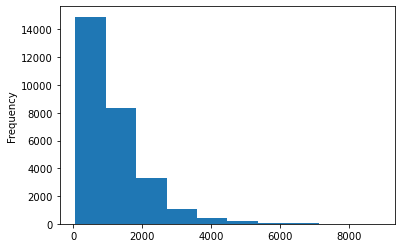

In [15]:
df["n_char"].plot.hist()

             n_trimmed  pct_trimmed
title                0            0
description          0            0
brand                0            0
category             0            0
main_cat             0            0
n_char          14,469           51
total_obs       14,469           51


<AxesSubplot:ylabel='Frequency'>

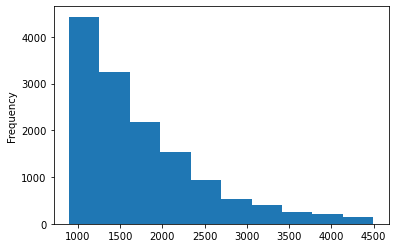

In [16]:
df = outliers.quantile_trim(df, lower=.5, upper=.99, subset=["n_char"])
df["n_char"].plot.hist()

In [17]:
df["lang"] = lang.detect_lang(df["description"], n_jobs=-1, seed=30)
df["lang"].value_counts()

detect_lang:   0%|          | 0/13880 [00:00<?, ?it/s]

en    13875
fr        1
de        1
sl        1
es        1
id        1
Name: lang, dtype: int64

In [18]:
df = df.loc[df.lang == "en"].copy()
df.drop(columns="lang")
df.shape

(13875, 7)

In [19]:
keep = df["main_cat"].value_counts().loc[lambda x: x > 10].index
df = df.loc[df.main_cat.isin(keep)]
display(df["main_cat"].unique())
df.shape

array(['Health', 'Electronics', 'Baby', 'Food', 'Sports & Outdoors',
       'Home Improvement', 'Personal Care', 'Toys',
       'Household Essentials', 'Industrial & Scientific',
       'Patio & Garden', 'Clothing', 'Pets', 'Beauty', 'Home', 'Seasonal',
       'Premium Beauty', 'Auto & Tires', 'Party & Occasions'],
      dtype=object)

(13840, 7)

In [20]:
df = df.sort_values("main_cat").reset_index(drop=True)
df.to_parquet("data/walmart.parquet", engine="pyarrow")